<a href="https://colab.research.google.com/github/konaanitha/CodelabsIT496/blob/main/Anithak_DuPontAnalysis_ClassActivity6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

myAPIKey = '79fc3166e685d1fce583c5a0a5c9b71b'

stock = 'TSLA'
balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()

incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()



In [49]:
print(balanceStatements[:5])

[{'date': '2021-12-31', 'symbol': 'TSLA', 'reportedCurrency': 'USD', 'cik': '0001318605', 'fillingDate': '2022-02-07', 'acceptedDate': '2022-02-04 20:11:27', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 17576000000, 'shortTermInvestments': 131000000, 'cashAndShortTermInvestments': 17707000000, 'netReceivables': 1913000000, 'inventory': 5757000000, 'otherCurrentAssets': 1723000000, 'totalCurrentAssets': 27100000000, 'propertyPlantEquipmentNet': 31176000000, 'goodwill': 200000000, 'intangibleAssets': 1517000000, 'goodwillAndIntangibleAssets': 1717000000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 2138000000, 'totalNonCurrentAssets': 35031000000, 'otherAssets': 0.0, 'totalAssets': 62131000000, 'accountPayables': 10025000000, 'shortTermDebt': 1589000000, 'taxPayables': 1122000000, 'deferredRevenue': 2372000000, 'otherCurrentLiabilities': 5719000000, 'totalCurrentLiabilities': 19705000000, 'longTermDebt': 5245000000, 'deferredRevenueNonCurren

In [50]:
# the numbers from the two most recent years

twoYearBalanceStatement = balanceStatements[:5]
twoYearIncomeStatement = incomeStatements[:5]


In [51]:
#first fraction
profitability = []
#second fraction
assetTurnOver = []
#Third fraction
capitalStructure = []
returnOnEquity = []
dates=[]

# getting details

for i in range(0,5):
  dates.append(twoYearBalanceStatement[i]['date'])
  profitabilityValue = twoYearIncomeStatement[i]['netIncome']/twoYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)

  assetTurnOverValue = twoYearIncomeStatement[i]['revenue']/twoYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue = twoYearBalanceStatement[i]['totalAssets']/twoYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)

  returnOnEquityValue = profitabilityValue * assetTurnOverValue * capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

In [52]:
print(returnOnEquity)

[0.1828149325913412, 0.03104611923509561, -0.13025083106678756, -0.19826179613722092, -0.4628954400055508]


In [53]:
#creating DataFrame
df = pd.DataFrame(columns = ['date','profitability','assetTurnOver','CapitalStructure','returnOnEquity'])
#df['year'] = pd. DatetimeIndex(df['date']). year.

df['profitability'] = profitability
df['assetTurnOver'] = assetTurnOver
df['CapitalStructure'] = capitalStructure

df['returnOnEquity'] = returnOnEquity
df['date'] = dates


print(df)

         date  profitability  assetTurnOver  CapitalStructure  returnOnEquity
0  2021-12-31       0.102540       0.866283          2.058068        0.182815
1  2020-12-31       0.021880       0.604740          2.346367        0.031046
2  2019-12-31      -0.035072       0.716372          5.184195       -0.130251
3  2018-12-31      -0.045482       0.721639          6.040655       -0.198262
4  2017-12-31      -0.166803       0.410351          6.762741       -0.462895


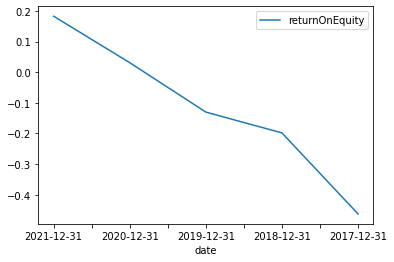

In [54]:
df.plot(x ='date', y='returnOnEquity', kind = 'line')
plt.show()

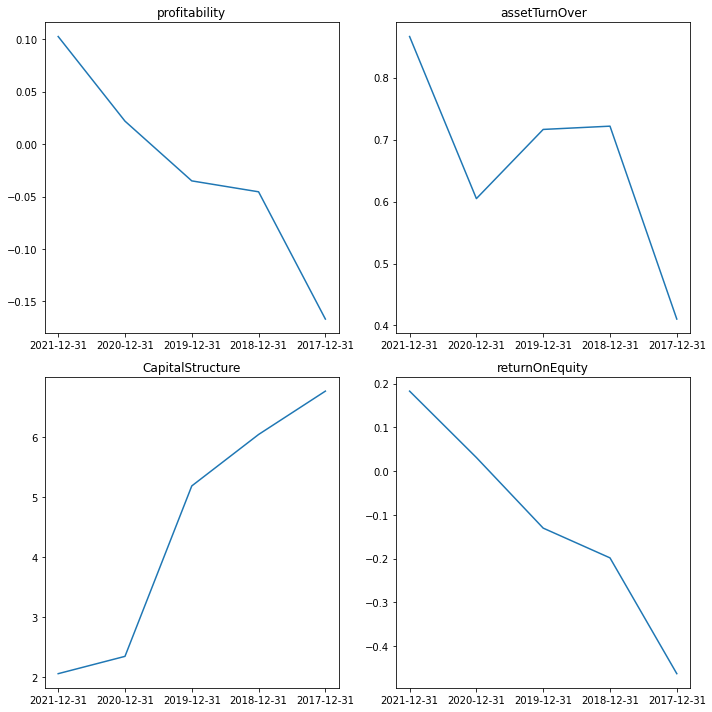

In [64]:
#plt.figure(figsize=(4,4))
fig, axs = plt.subplots(2, 2,figsize=(10,10))
x= df['date']
values = ['profitability','assetTurnOver','CapitalStructure','returnOnEquity']
for i in range(0,2):
   for j in range(0,2):
     valueIndex = i*2 + j
     axs[i,j].plot (x,df[values[valueIndex]])
     axs[i,j]. set_title(values[valueIndex])

     fig.tight_layout()
  

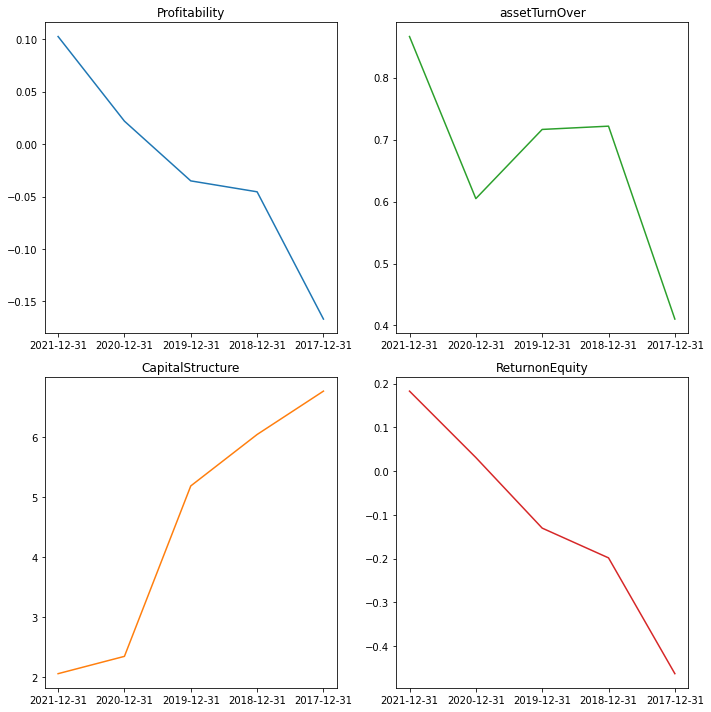

In [62]:
from IPython.core.pylabtools import figsize
fig, axs = plt.subplots(2, 2,figsize=(10,10))
x = df['date']
axs[0, 0].plot(x, df['profitability'])
axs[0, 0].set_title('Profitability')
axs[0, 1].plot(x, df['assetTurnOver'],'tab:green')
axs[0, 1].set_title('assetTurnOver')
axs[1, 0].plot(x, df['CapitalStructure'],'tab:orange')
axs[1, 0].set_title('CapitalStructure')
axs[1, 1].plot(x, df['returnOnEquity'], 'tab:red')
axs[1, 1].set_title('ReturnonEquity')

fig.tight_layout()